In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from statistics import mode
import tensorflow as tf
import random
import os
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.utils import shuffle
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import time


In [2]:
# Read the CSV file 
df = pd.read_csv('/Users/yangboyu/Downloads/wine+quality/winequality-red.csv', sep=';')

df

# Check the DataFrame

# # Select all columns except the last one as features (X)
X = df.iloc[:, :-1]

# # Select the last column as the target variable (y)
y = df.iloc[:, -1]

# print(X)
# print(y)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# split the data for training and testing  20% for testing and 80% for training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
def train_perceptron_model(X_train, y_train, X_test, y_test):
   

    # Assigning binary labels: 1 for quality=5 and 0 for other qualities
    y_train_binary = (y_train == 5)
    y_test_binary = (y_test == 5)
    # WE have use one vs rest method in the perceptron model. We use quality 5 vs the rest of the quality
    
    perceptron = Perceptron()

    # Train the model sequentially
    perceptron.fit(X_train, y_train_binary)

    # Predict the target variable for the test set
    y_pred = perceptron.predict(X_test)
    

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test_binary, y_pred)
    
    return accuracy

In [5]:
#standardized the data (不确定要不要，可以到时候再加上去)


In [6]:
#ANN 
# Initialize the MLP classifier with custom activation function for hidden layers
# batch_size ='auto' 就是 sequential training 

def train_ann_model(X_train, y_train, X_test, y_test):

    # Initialize the MLP classifier with specified hyperparameters
    mlp = MLPClassifier(
        hidden_layer_sizes=(100),  # Number of neurons in the hidden layer
        activation='logistic',  # Activation function for the hidden layer
        max_iter=1000,  # Maximum number of iterations (epochs)
        batch_size='auto',  # Batch size for training
        random_state=42  # Random state for reproducibility
    )

    ann_start_time = time.time()

    # Train the model
    mlp.fit(X_train, y_train)

    # End the timer
    ann_end_time = time.time()

    # Calculate the training time
    ann_training_time = ann_end_time - ann_start_time
    
    y_pred_mlp = mlp.predict(X_test)

    # Calculate the accuracy of the model
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
    
    return accuracy_mlp, ann_training_time

In [7]:
accuracy_mlp, training_time = train_ann_model(X_train, y_train, X_test, y_test)
print("ANN Accuracy:", accuracy_mlp)
print("ANN Training Time:", training_time, "seconds")

ANN Accuracy: 0.5625
ANN Training Time: 0.30812597274780273 seconds


In [8]:
#ANN corss validation 
def train_anncv_model(X_train, y_train) :
    
        mlp = MLPClassifier(
        hidden_layer_sizes=(100,),  # Number of neurons in the hidden layer
        activation='logistic',  # Activation function for the hidden layer
        max_iter=1000,  # Maximum number of iterations (epochs)
        batch_size='auto',  # Batch size for training
        random_state=42,  # Random state for reproducibility
        learning_rate='constant',
    )

    # Perform 5-fold cross-validation
        cv_scores = cross_val_score(mlp, X_train, y_train, cv=5)

    # Calculate the mean accuracy of cross-validation scores
        cv_accuracy = cv_scores.mean()
    
        return cv_accuracy

In [9]:
#Decision tree 
def train_decision_tree(X_train, y_train, X_test, y_test):
    
    decision_tree = DecisionTreeClassifier(
        criterion='entropy',  # Split criterion: 'entropy' for information gain
        max_depth=100,  # Maximum depth of the tree
        min_samples_split=2,  # Minimum number of samples required to split an internal node
        min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
        max_features=100,  # Number of features to consider when looking for the best split
        random_state=42  # Random state for reproducibility
    )    

    # Initialize the Decision Tree classifier
    decision_tree = DecisionTreeClassifier(random_state=42)

    dc_start_time = time.time()

    # Train the model
    decision_tree.fit(X_train, y_train)

    # End the timer
    dc_end_time = time.time()

    # Calculate the training time
    dc_training_time = dc_end_time - dc_start_time

    # Predict the target variable for the test set
    y_pred = decision_tree.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, dc_training_time


In [10]:
accuracy3, dc_time = train_decision_tree(X_train, y_train, X_test, y_test)
print("Decision Tree Accuracy:", accuracy3)
print("Decision Tree Training Time:", dc_time, "seconds")

Decision Tree Accuracy: 0.559375
Decision Tree Training Time: 0.01784205436706543 seconds


In [11]:
def train_decision_tree_cv(X_train, y_train):

    # Initialize the Decision Tree classifier with specified hyperparameters
    decision_tree = DecisionTreeClassifier(
        criterion='entropy',  # Split criterion: 'entropy' for information gain
        max_depth=100,  # Maximum depth of the tree
        min_samples_split=2,  # Minimum number of samples required to split an internal node
        min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
        max_features=100,  # Number of features to consider when looking for the best split
        random_state=42  # Random state for reproducibility
    )

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)

    # Calculate the mean accuracy of cross-validation scores
    cv_accuracy = cv_scores.mean()
    
    return cv_accuracy

In [15]:
# Random forest 
def train_random_forest(X_train, y_train, X_test, y_test):

    # Initialize the Random Forest classifier with specified hyperparameters
    random_forest = RandomForestClassifier(
        n_estimators=100,  # Number of trees in the forest
        criterion='entropy',  # Split criterion: 'gini' for Gini impurity or 'entropy' for information gain
        max_depth=None,  # Maximum depth of the trees
        min_samples_split=2,  # Minimum number of samples required to split an internal node
        min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
        max_features=None,  # Number of features to consider when looking for the best split
        random_state=42,  # Random state for reproducibility     
    )

    # Start the timer
    rf_start_time = time.time()

    # Train the model
    random_forest.fit(X_train, y_train)

    # End the timer
    rf_end_time = time.time()

    # Calculate the training time
    rf_training_time = rf_end_time - rf_start_time

    # Predict the target variable for the test set
    y_pred = random_forest.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, rf_training_time

In [16]:
accuracy4, rf_time = train_random_forest(X_train, y_train, X_test, y_test)
print("Random Forest Accuracy:", accuracy4)
print("Random Forest Training Time:", rf_time, "seconds")

Random Forest Accuracy: 0.640625
Random Forest Training Time: 0.5135889053344727 seconds


In [18]:
def train_random_forest_cv(X_train, y_train):
    
    # Initialize the Random Forest classifier with specified hyperparameters
    random_forest = RandomForestClassifier(
        n_estimators=100,  # Number of trees in the forest
        criterion='entropy',  # Split criterion: 'gini' for Gini impurity or 'entropy' for information gain
        max_depth=None,  # Maximum depth of the trees
        min_samples_split=2,  # Minimum number of samples required to split an internal node
        min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
        max_features=None,  # Number of features to consider when looking for the best split
        random_state=42,  # Random state for reproducibility     
    )

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5)

    # Calculate the mean accuracy of cross-validation scores
    cv_accuracy = cv_scores.mean()
    
    return cv_accuracy

In [13]:
accuracy4, time = train_random_forest(X_train, y_train, X_test, y_test)


In [19]:
#Call the function
# accuracy = train_perceptron_model(X_train, y_train, X_test, y_test)
# print("Perceptron Accuracy:", accuracy)
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
accuracy_mlp, training_time = train_ann_model(X_train, y_train, X_test, y_test)
print("ANN Accuracy:", accuracy_mlp)
print("ANN Training Time:", training_time, "seconds")

accuracy2=train_anncv_model(X_train, y_train)
print("ANN corss validation accuracy:", accuracy2)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
accuracy3, dc_time = train_decision_tree(X_train, y_train, X_test, y_test)
print("Decision Tree Accuracy:", accuracy3)
print("Decision Tree Training Time:", dc_time, "seconds")

accuracy3 = train_decision_tree_cv(X_train, y_train)
print("Decision Tree cross validation Accuracy:", accuracy3)
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
accuracy4, rf_time = train_random_forest(X_train, y_train, X_test, y_test)
print("Random Forest Accuracy:", accuracy4)
print("Random Forest Training Time:", rf_time, "seconds")

accuracy4 = train_random_forest_cv(X_train, y_train)
print("Random Forest cross validation Accuracy:", accuracy4)

ANN Accuracy: 0.5625
ANN Training Time: 0.30739307403564453 seconds
ANN corss validation accuracy: 0.5966023284313725
Decision Tree Accuracy: 0.559375
Decision Tree Training Time: 0.011275053024291992 seconds
Decision Tree cross validation Accuracy: 0.5950428921568627
Random Forest Accuracy: 0.640625
Random Forest Training Time: 0.5444803237915039 seconds
Random Forest cross validation Accuracy: 0.6755729166666666


/Users/yangboyu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


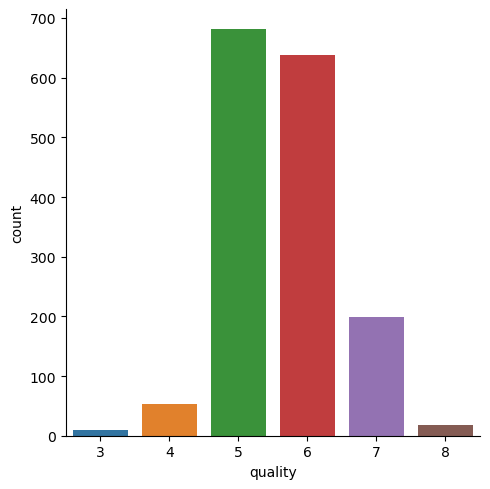

In [14]:
sns.catplot(x='quality',data=df,kind='count')

In [ ]:
# training time for each of the model 
